In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

police_killings = pd.read_csv("/Users/shobhit/Documents/python/GitHub/PythonCode/police_killings.csv",encoding = "ISO-8859-1")

In [3]:
police_killings.columns

Index(['name', 'age', 'gender', 'raceethnicity', 'month', 'day', 'year',
       'streetaddress', 'city', 'state', 'latitude', 'longitude', 'state_fp',
       'county_fp', 'tract_ce', 'geo_id', 'county_id', 'namelsad',
       'lawenforcementagency', 'cause', 'armed', 'pop', 'share_white',
       'share_black', 'share_hispanic', 'p_income', 'h_income',
       'county_income', 'comp_income', 'county_bucket', 'nat_bucket', 'pov',
       'urate', 'college'],
      dtype='object')

In [4]:
police_killings.head(5)

,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,...,share_hispanic,p_income,h_income,county_income,comp_income,county_bucket,nat_bucket,pov,urate,college
0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,...,5.6,28375,51367.0,54766,0.937936,3.0,3.0,14.1,0.097686,0.168510
1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,...,0.5,14678,27972.0,40930,0.683411,2.0,1.0,28.8,0.065724,0.111402
2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,...,16.8,25286,45365.0,54930,0.825869,2.0,3.0,14.6,0.166293,0.147312
3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,...,98.8,17194,48295.0,55909,0.863814,3.0,3.0,11.7,0.124827,0.050133
4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,...,1.7,33954,68785.0,49669,1.384868,5.0,4.0,1.9,0.063550,0.403954


In [7]:
police = police_killings[police_killings.columns[9:15]]

In [8]:
police.head()

,state,latitude,longitude,state_fp,county_fp,tract_ce
0,AL,32.529577,-86.362829,1,51,30902
1,LA,31.321739,-92.434860,22,79,11700
2,WI,42.583560,-87.835710,55,59,1200
3,CA,33.939298,-118.219463,6,37,535607
4,OH,41.148575,-81.429878,39,153,530800


In [9]:
counts = police_killings["raceethnicity"].value_counts()

In [10]:
counts

White                     236
Black                     135
Hispanic/Latino            67
Unknown                    15
Asian/Pacific Islander     10
Native American             4
Name: raceethnicity, dtype: int64

([<matplotlib.axis.XTick at 0x11632ac50>,
 <a list of 6 Text xticklabel objects>)

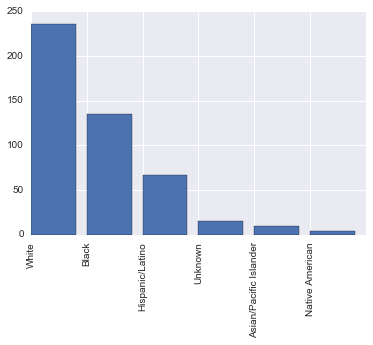

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.bar(range(6), counts)
plt.xticks(range(6), counts.index, rotation="vertical")

In [12]:

counts / sum(counts)

White                     0.505353
Black                     0.289079
Hispanic/Latino           0.143469
Unknown                   0.032120
Asian/Pacific Islander    0.021413
Native American           0.008565
Name: raceethnicity, dtype: float64

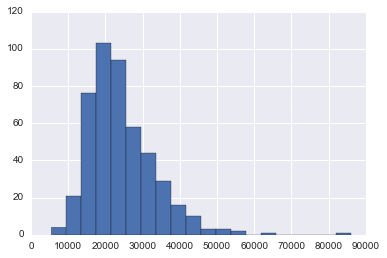

In [13]:
police_killings["p_income"][police_killings["p_income"] != "-"].astype(float).hist(bins=20)

In [14]:
police_killings["p_income"][police_killings["p_income"] != "-"].astype(float).median()

22348.0


Income breakdown
According to the [census](https://en.wikipedia.org/wiki/Personal_income_in_the_United_States), median personal income in the US is 28,567, and our median is 22,348, which means that shootings tend to happen in less affluent areas. Our sample size is relatively small, though, so it's hard to make sweeping conclusions.

In [15]:
state_pop = pd.read_csv("/Users/shobhit/Documents/python/GitHub/PythonCode/state_data.csv",encoding = "ISO-8859-1")

In [16]:
state_pop.head()

,SUMLEV,REGION,DIVISION,STATE,NAME,POPESTIMATE2015,POPEST18PLUS2015,PCNT_POPEST18PLUS
0,10,0,0,0,United States,321418820,247773709,77.1
1,40,3,6,1,Alabama,4858979,3755483,77.3
2,40,4,9,2,Alaska,738432,552166,74.8
3,40,4,8,4,Arizona,6828065,5205215,76.2
4,40,3,7,5,Arkansas,2978204,2272904,76.3


In [17]:
counts = police_killings["state_fp"].value_counts()

states = pd.DataFrame({"STATE": counts.index, "shootings": counts})

In [18]:
states = states.merge(state_pop, on="STATE")

In [19]:

states["pop_millions"] = states["POPESTIMATE2015"] / 1000000
states["rate"] = states["shootings"] / states["pop_millions"]

states.sort("rate")

/Users/shobhit/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,STATE,shootings,SUMLEV,REGION,DIVISION,NAME,POPESTIMATE2015,POPEST18PLUS2015,PCNT_POPEST18PLUS,pop_millions,rate
43,9,1,40,1,1,Connecticut,3590886,2826827,78.7,3.590886,0.278483
22,42,7,40,1,2,Pennsylvania,12802503,10112229,79.0,12.802503,0.546768
38,19,2,40,2,4,Iowa,3123899,2395103,76.7,3.123899,0.640226
6,36,13,40,1,2,New York,19795791,15584974,78.7,19.795791,0.656705
29,25,5,40,1,1,Massachusetts,6794422,5407335,79.6,6.794422,0.735898
42,33,1,40,1,1,New Hampshire,1330608,1066610,80.2,1.330608,0.751536
45,23,1,40,1,1,Maine,1329328,1072948,80.7,1.329328,0.752260
11,17,11,40,2,3,Illinois,12859995,9901322,77.0,12.859995,0.855366
12,39,10,40,2,3,Ohio,11613423,8984946,77.4,11.613423,0.861073
31,55,5,40,2,3,Wisconsin,5771337,4476711,77.6,5.771337,0.866350



Killings by state
States in the midwest and south seem to have the highest police killing rates, whereas those in the northeast seem to have the lowest.



In [28]:
police_killings["state"].value_counts()


CA    74
TX    46
FL    29
AZ    25
OK    22
GA    16
NY    14
CO    12
LA    11
IL    11
NJ    11
WA    11
MO    10
NC    10
MD    10
OH    10
MI     9
SC     9
VA     9
OR     8
AL     8
IN     8
PA     7
KY     7
MN     6
KS     6
NE     6
TN     6
MS     6
NM     5
UT     5
WI     5
MA     5
ID     4
AR     4
HI     4
NV     3
WV     2
AK     2
IA     2
MT     2
DE     2
NH     1
CT     1
ME     1
WY     1
DC     1
Name: state, dtype: int64

In [27]:

pk = police_killings[
    (police_killings["share_white"] != "-") & 
    (police_killings["share_black"] != "-") & 
    (police_killings["share_hispanic"] != "-")
]

pk["share_white"] = pk["share_white"].astype(float)
pk["share_black"] = pk["share_black"].astype(float)
pk["share_hispanic"] = pk["share_hispanic"].astype(float)

pk.head()

/Users/shobhit/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/shobhit/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/shobhit/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/s

,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,...,share_hispanic,p_income,h_income,county_income,comp_income,county_bucket,nat_bucket,pov,urate,college
0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,...,5.6,28375,51367.0,54766,0.937936,3.0,3.0,14.1,0.097686,0.168510
1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,...,0.5,14678,27972.0,40930,0.683411,2.0,1.0,28.8,0.065724,0.111402
2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,...,16.8,25286,45365.0,54930,0.825869,2.0,3.0,14.6,0.166293,0.147312
3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,...,98.8,17194,48295.0,55909,0.863814,3.0,3.0,11.7,0.124827,0.050133
4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,...,1.7,33954,68785.0,49669,1.384868,5.0,4.0,1.9,0.063550,0.403954


In [22]:
lowest_states = ["CT", "PA", "IA", "NY", "MA", "NH", "ME", "IL", "OH", "WI"]
highest_states = ["OK", "AZ", "NE", "HI", "AK", "ID", "NM", "LA", "CO", "DE"]

ls = pk[pk["state"].isin(lowest_states)]
hs = pk[pk["state"].isin(highest_states)]

In [23]:
columns = ["pop", "county_income", "share_white", "share_black", "share_hispanic"]

ls[columns].mean()

pop                4201.660714
county_income     54830.839286
share_white          60.616071
share_black          21.257143
share_hispanic       12.948214
dtype: float64

In [25]:
hs[columns].mean()

pop                4315.750000
county_income     48706.967391
share_white          55.652174
share_black          11.532609
share_hispanic       20.693478
dtype: float64

<font color= 'blue'>State by state rates</font>
It looks like the states with low rates of shootings tend to have a higher proportion of blacks in the population, and a lower proportion of hispanics in the census regions where the shootings occur. It looks like the income of the counties where the shootings occur is higher.
States with high rates of shootings tend to have high hispanic population shares in the counties where shootings occur.